# 단어개수 워드클라우드


In [ ]:
pip install --upgrade pip

In [3]:
pip install koreanize-matplotlib

   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/7.9 MB 10.8 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/7.9 MB 10.6 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/7.9 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 7.9/7.9 MB 9.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import koreanize_matplotlib

문장을 입력하세요. (빈 줄을 입력하면 종료됩니다.)

개선되기 전 코드

문장을 입력하세요. (빈 줄을 입력하면 종료됩니다.)


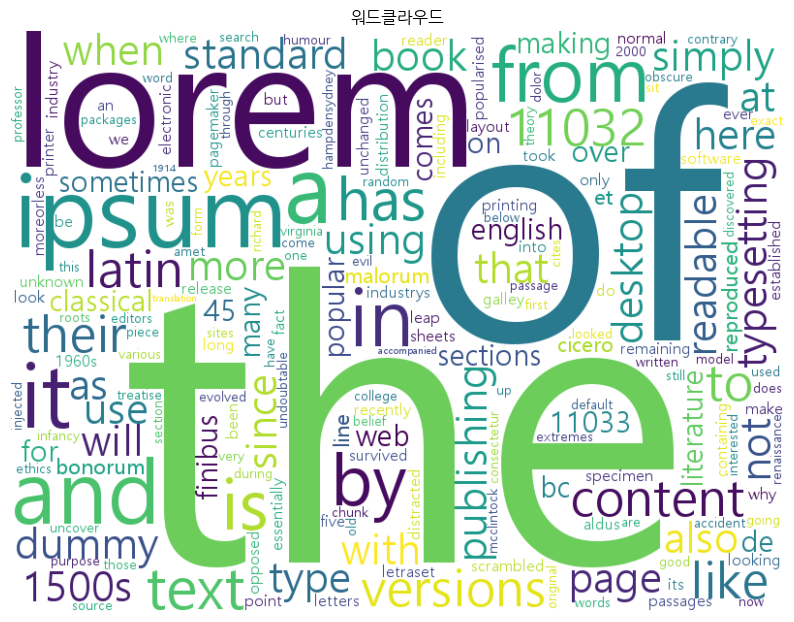

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import matplotlib.font_manager as fm

def count_words_and_generate_wordcloud():
    print("문장을 입력하세요. (빈 줄을 입력하면 종료됩니다.)")
    lines = []
    while True:
        line = input()
        if line.strip() == "":
            break
        lines.append(line)

    # 모든 입력된 문장을 하나로 합치고 소문자로 변환
    text = ' '.join(lines).lower()

    # 문장부호 제거
    translator = str.maketrans('', '', string.punctuation)
    cleaned_text = text.translate(translator)

    # 단어 나누기
    words = cleaned_text.split()

    # 단어 빈도수 계산
    word_counts = {}
    for word in words:
        word_counts[word] = word_counts.get(word, 0) + 1

    # 워드클라우드 폰트 설정 (한글 깨짐 방지)
    # 윈도우: 'malgun.ttf', 맥: 'AppleGothic', 리눅스: 'NanumGothic'
    font_path = fm.findfont(fm.FontProperties(family='Malgun Gothic'))

    # 워드클라우드 객체 생성
    wc = WordCloud(
        font_path=font_path,  # 한글 폰트 경로
        background_color='white',  # 배경색
        width=800,
        height=600
    )

    # 단어 빈도수를 기반으로 워드클라우드 생성
    wc.generate_from_frequencies(word_counts)

    # 이미지 출력
    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')  # 축 제거
    plt.title("워드클라우드")
    plt.show()

count_words_and_generate_wordcloud()


# 개선된 코드

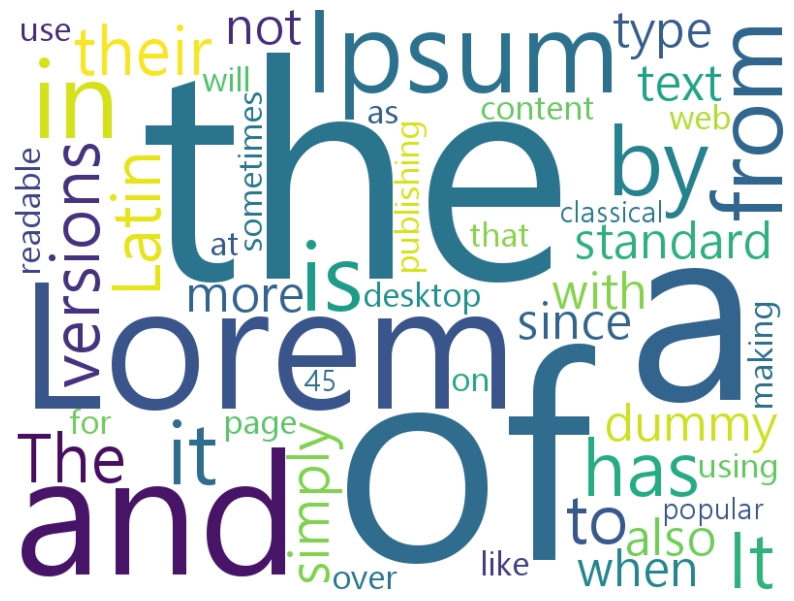

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import platform

# 1. 분석할 텍스트 입력 (주피터 노트북에서는 변수에 직접 넣는 것이 수정 및 관리에 유리합니다)
text = """
Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.

Why do we use it?
It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, and a search for 'lorem ipsum' will uncover many web sites still in their infancy. Various versions have evolved over the years, sometimes by accident, sometimes on purpose (injected humour and the like).


Where does it come from?
Contrary to popular belief, Lorem Ipsum is not simply random text. It has roots in a piece of classical Latin literature from 45 BC, making it over 2000 years old. Richard McClintock, a Latin professor at Hampden-Sydney College in Virginia, looked up one of the more obscure Latin words, consectetur, from a Lorem Ipsum passage, and going through the cites of the word in classical literature, discovered the undoubtable source. Lorem Ipsum comes from sections 1.10.32 and 1.10.33 of "de Finibus Bonorum et Malorum" (The Extremes of Good and Evil) by Cicero, written in 45 BC. This book is a treatise on the theory of ethics, very popular during the Renaissance. The first line of Lorem Ipsum, "Lorem ipsum dolor sit amet..", comes from a line in section 1.10.32.

The standard chunk of Lorem Ipsum used since the 1500s is reproduced below for those interested. Sections 1.10.32 and 1.10.33 from "de Finibus Bonorum et Malorum" by Cicero are also reproduced in their exact original form, accompanied by English versions from the 1914 translation by H. Rackham.
"""

def generate_wordcloud(text):
    # 2. 전처리 (특수문자 제거 등은 워드클라우드 내부에서 어느 정도 처리해주므로, 여기서는 간단히 공백 기준 분리만 진행)
    # 한글은 형태소 분석기(Konlpy)를 쓰는 것이 가장 좋으나, 간단한 실습을 위해 공백 기준으로 나눕니다.
    words = text.split()

    # 3. 단어 빈도수 계산 (Counter 모듈 사용 - 모던 파이썬 방식)
    # 직접 for문을 돌릴 필요 없이 리스트만 넘기면 알아서 세어줍니다.
    word_counts = Counter(words)

    # 4. 폰트 설정 (OS에 따른 자동 설정)
    os_name = platform.system()
    if os_name == 'Windows':
        font_path = 'malgun.ttf'
    elif os_name == 'Darwin':  # Mac
        font_path = 'AppleGothic'
    else: # Linux (Colab 등) - 코랩은 별도 폰트 설치 필요
        font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

    # 5. 워드클라우드 객체 생성
    try:
        wc = WordCloud(
            font_path=font_path,
            background_color='white',
            width=800,
            height=600,
            max_words=50  # 너무 많은 단어가 보이면 지저분하므로 상위 50개만 표시
        )
        wc.generate_from_frequencies(word_counts)
    except OSError:
        print("폰트 파일을 찾을 수 없습니다. 기본 폰트로 실행합니다. (한글이 깨질 수 있습니다.)")
        wc = WordCloud(background_color='white', width=800, height=600)
        wc.generate_from_frequencies(word_counts)

    # 6. 이미지 출력
    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# 함수 실행
generate_wordcloud(text)

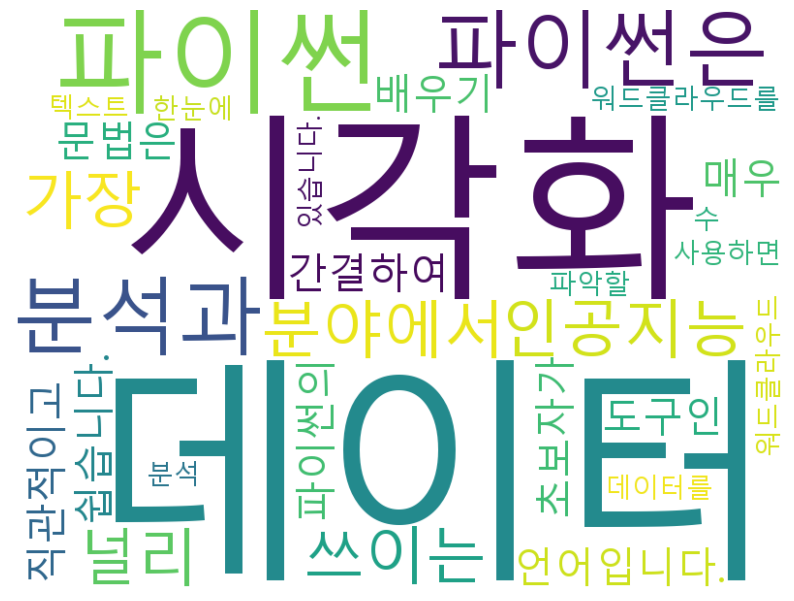

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import platform

# 1. 분석할 텍스트 입력 (주피터 노트북에서는 변수에 직접 넣는 것이 수정 및 관리에 유리합니다)
text = """
파이썬은 데이터 분석과 인공지능 분야에서 가장 널리 쓰이는 언어입니다.
파이썬의 문법은 매우 직관적이고 간결하여 초보자가 배우기 쉽습니다.
데이터 시각화 도구인 워드클라우드를 사용하면 텍스트 데이터를 한눈에 파악할 수 있습니다.
파이썬 파이썬 워드클라우드 시각화 분석 데이터
"""

def generate_wordcloud(text):
    # 2. 전처리 (특수문자 제거 등은 워드클라우드 내부에서 어느 정도 처리해주므로, 여기서는 간단히 공백 기준 분리만 진행)
    # 한글은 형태소 분석기(Konlpy)를 쓰는 것이 가장 좋으나, 간단한 실습을 위해 공백 기준으로 나눕니다.
    words = text.split()

    # 3. 단어 빈도수 계산 (Counter 모듈 사용 - 모던 파이썬 방식)
    # 직접 for문을 돌릴 필요 없이 리스트만 넘기면 알아서 세어줍니다.
    word_counts = Counter(words)

    # 4. 폰트 설정 (OS에 따른 자동 설정)
    os_name = platform.system()
    if os_name == 'Windows':
        font_path = 'malgun.ttf'
    elif os_name == 'Darwin':  # Mac
        font_path = 'AppleGothic'
    else: # Linux (Colab 등) - 코랩은 별도 폰트 설치 필요
        font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

    # 5. 워드클라우드 객체 생성
    try:
        wc = WordCloud(
            font_path=font_path,
            background_color='white',
            width=800,
            height=600,
            max_words=50  # 너무 많은 단어가 보이면 지저분하므로 상위 50개만 표시
        )
        wc.generate_from_frequencies(word_counts)
    except OSError:
        print("폰트 파일을 찾을 수 없습니다. 기본 폰트로 실행합니다. (한글이 깨질 수 있습니다.)")
        wc = WordCloud(background_color='white', width=800, height=600)
        wc.generate_from_frequencies(word_counts)

    # 6. 이미지 출력
    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# 함수 실행
generate_wordcloud(text)